**This notebook trains three different transfer learning models using pre-trained Keras vision architectures:**

- MobileNetV2

- EfficientNetB0

- ResNet50

Steps:

- All models used 224√ó224 input images.

- Preprocessing layers were included for each model (e.g., MobileNetV2‚Äôs preprocess_input).

- Pretrained weights were frozen (feature extraction).

- Global average pooling, dropout, and softmax layers were added.

- Each model was trained for 10 epochs and saved to disk.

- Learning curves were plotted to visualize accuracy across epochs.

- Optimization were perfomed to increase the models accuracies.

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Path and settings
subset_dir = "/Users/lauratm/Downloads/archive/subset_224x224"
image_size = (224, 224)
batch_size = 10


In [28]:
train_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.6,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names


Found 1568 files belonging to 7 classes.
Using 1255 files for training.
Found 1568 files belonging to 7 classes.
Using 940 files for validation.



 Training MobileNetV2...

Epoch 1/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 122ms/step - accuracy: 0.1848 - loss: 2.3089 - val_accuracy: 0.3011 - val_loss: 1.7594
Epoch 2/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 122ms/step - accuracy: 0.2920 - loss: 1.8643 - val_accuracy: 0.3904 - val_loss: 1.5751
Epoch 3/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 122ms/step - accuracy: 0.3702 - loss: 1.6237 - val_accuracy: 0.4234 - val_loss: 1.5017
Epoch 4/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 122ms/step - accuracy: 0.4545 - loss: 1.4741 - val_accuracy: 0.4840 - val_loss: 1.4159
Epoch 5/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 122ms/step - accuracy: 0.4546 - loss: 1.3920 - val_accuracy: 0.5128 - val_loss: 1.3667
Epoch 6/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 121ms/step - accuracy: 0.4968 - lo

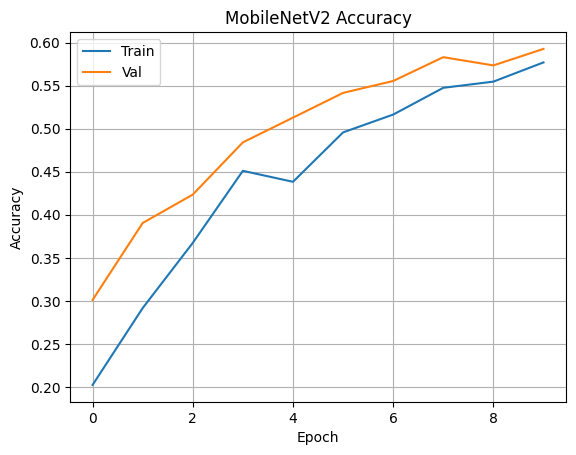


 Training EfficientNetB0...

Epoch 1/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 188ms/step - accuracy: 0.1863 - loss: 1.9466 - val_accuracy: 0.3734 - val_loss: 1.6760
Epoch 2/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 178ms/step - accuracy: 0.3536 - loss: 1.6984 - val_accuracy: 0.4064 - val_loss: 1.5776
Epoch 3/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 184ms/step - accuracy: 0.3846 - loss: 1.6126 - val_accuracy: 0.4564 - val_loss: 1.4996
Epoch 4/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 181ms/step - accuracy: 0.4432 - loss: 1.5120 - val_accuracy: 0.4543 - val_loss: 1.4597
Epoch 5/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 184ms/step - accuracy: 0.4461 - loss: 1.4641 - val_accuracy: 0.4787 - val_loss: 1.4235
Epoch 6/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 182ms/step - accuracy: 0.4808 -

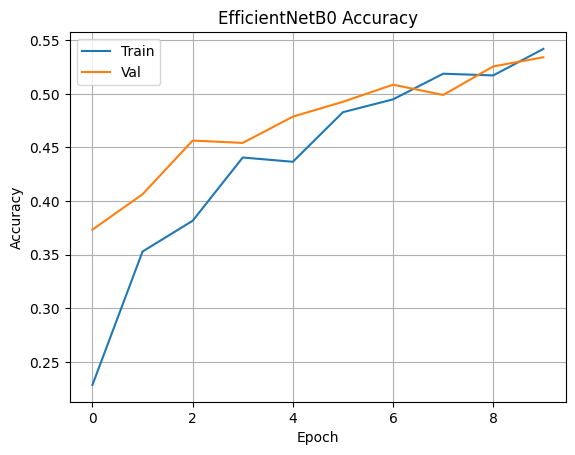


 Training ResNet50...

Epoch 1/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56s 431ms/step - accuracy: 0.2001 - loss: 2.4456 - val_accuracy: 0.3819 - val_loss: 1.5897
Epoch 2/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53s 423ms/step - accuracy: 0.3650 - loss: 1.7145 - val_accuracy: 0.4840 - val_loss: 1.3900
Epoch 3/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53s 421ms/step - accuracy: 0.4442 - loss: 1.5024 - val_accuracy: 0.5660 - val_loss: 1.2664
Epoch 4/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 418ms/step - accuracy: 0.4686 - loss: 1.3645 - val_accuracy: 0.5755 - val_loss: 1.2176
Epoch 5/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53s 422ms/step - accuracy: 0.5314 - loss: 1.2155 - val_accuracy: 0.6000 - val_loss: 1.1743
Epoch 6/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53s 418ms/step - accuracy: 0.5498 - loss:

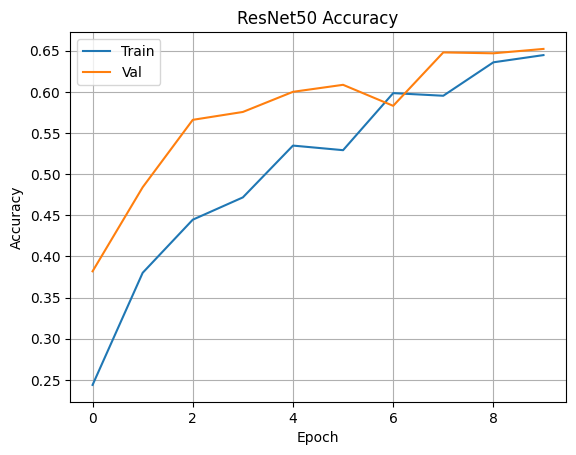

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
import matplotlib.pyplot as plt


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Helper function to build & train model
def train_transfer_model(base_model_class, preprocess_func, model_name, save_path, input_shape=(224, 224, 3), num_classes=7, epochs=10):
    print(f"\n Training {model_name}...\n")

    # Preprocessing layer
    preprocess_layer = layers.Lambda(preprocess_func, input_shape=input_shape)

    # Base model
    base_model = base_model_class(include_top=False, input_shape=input_shape, weights="imagenet")
    base_model.trainable = False  

    # Build the model
    model = models.Sequential([
        preprocess_layer,
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax")
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)
    model.save(save_path)
    print(f"{model_name} saved to {save_path}")

    # Plotting learning curves
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Val")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Train MobileNetV2
train_transfer_model(
    base_model_class=MobileNetV2,
    preprocess_func=mobilenet_preprocess,
    model_name="MobileNetV2",
    save_path="mobilenet_model.keras"
)

# Train EfficientNetB0
train_transfer_model(
    base_model_class=EfficientNetB0,
    preprocess_func=efficientnet_preprocess,
    model_name="EfficientNetB0",
    save_path="efficientnet_model.keras"
)

# Train ResNet50
train_transfer_model(
    base_model_class=ResNet50,
    preprocess_func=resnet_preprocess,
    model_name="ResNet50",
    save_path="resnet_model.keras"
)


## **Optimization**


üîß Training MobileNetV2...

Epoch 1/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 133ms/step - accuracy: 0.2296 - loss: 2.4539 - val_accuracy: 0.4755 - val_loss: 1.4851 - learning_rate: 0.0010
Epoch 2/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 127ms/step - accuracy: 0.4705 - loss: 1.4811 - val_accuracy: 0.6181 - val_loss: 1.1889 - learning_rate: 0.0010
Epoch 3/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 129ms/step - accuracy: 0.5552 - loss: 1.1591 - val_accuracy: 0.6883 - val_loss: 1.0171 - learning_rate: 0.0010
Epoch 4/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 129ms/step - accuracy: 0.6328 - loss: 1.0311 - val_accuracy: 0.7160 - val_loss: 0.9489 - learning_rate: 0.0010
Epoch 5/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15s 123ms/step - accuracy: 0.6857 - loss: 0.8456 - val_accuracy: 0.7457 - val_loss: 0.8747 - learning_rate: 0

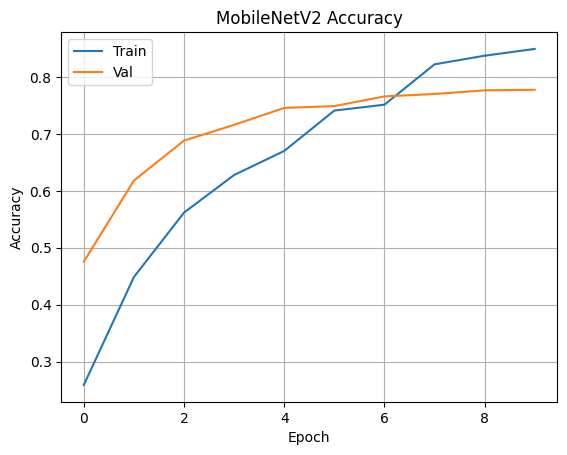


üîß Training EfficientNetB0...

Epoch 1/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 197ms/step - accuracy: 0.2020 - loss: 2.7037 - val_accuracy: 0.4340 - val_loss: 1.5842 - learning_rate: 0.0010
Epoch 2/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 196ms/step - accuracy: 0.4005 - loss: 1.6896 - val_accuracy: 0.5468 - val_loss: 1.3501 - learning_rate: 0.0010
Epoch 3/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 197ms/step - accuracy: 0.4753 - loss: 1.4357 - val_accuracy: 0.6043 - val_loss: 1.1675 - learning_rate: 0.0010
Epoch 4/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 197ms/step - accuracy: 0.5412 - loss: 1.2434 - val_accuracy: 0.6606 - val_loss: 1.0600 - learning_rate: 0.0010
Epoch 5/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 202ms/step - accuracy: 0.5551 - loss: 1.1769 - val_accuracy: 0.6681 - val_loss: 0.9807 - learning_rate

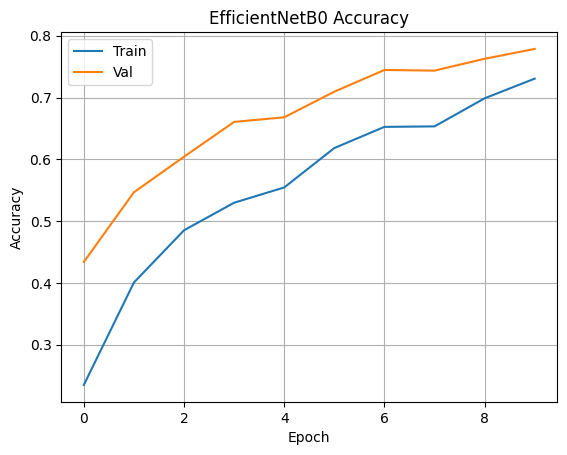


üîß Training ResNet50...

Epoch 1/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57s 431ms/step - accuracy: 0.2647 - loss: 2.4443 - val_accuracy: 0.4755 - val_loss: 1.4225 - learning_rate: 0.0010
Epoch 2/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86s 684ms/step - accuracy: 0.5038 - loss: 1.3512 - val_accuracy: 0.6021 - val_loss: 1.1766 - learning_rate: 0.0010
Epoch 3/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 436ms/step - accuracy: 0.5386 - loss: 1.1874 - val_accuracy: 0.6766 - val_loss: 1.0259 - learning_rate: 0.0010
Epoch 4/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54s 428ms/step - accuracy: 0.6382 - loss: 1.0078 - val_accuracy: 0.7170 - val_loss: 0.8948 - learning_rate: 0.0010
Epoch 5/10
126/126 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54s 428ms/step - accuracy: 0.7067 - loss: 0.7930 - val_accuracy: 0.7628 - val_loss: 0.8071 - learning_rate: 0.00

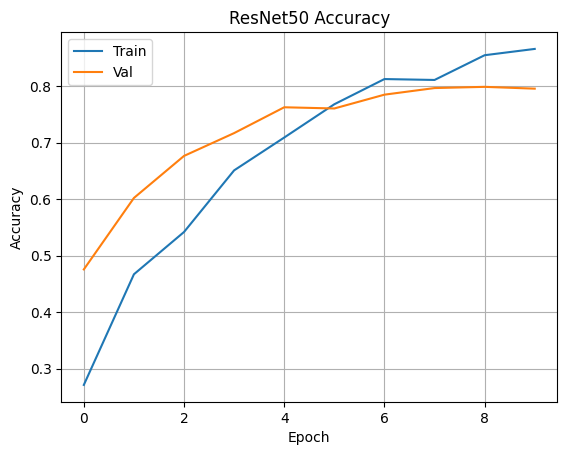

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Optimize dataset pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Training helper function
def train_transfer_model(base_model_class, preprocess_func, model_name, save_path, input_shape=(224, 224, 3), num_classes=7, epochs=10):
    print(f"\nüîß Training {model_name}...\n")

    # Preprocessing layer
    preprocess_layer = layers.Lambda(preprocess_func, input_shape=input_shape)

    # Base model
    base_model = base_model_class(include_top=False, input_shape=input_shape, weights="imagenet")
    base_model.trainable = False

    # Build model
    model = models.Sequential([
        preprocess_layer,
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    callbacks = [
        EarlyStopping(patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2)
    ]

    # Train
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    model.save(save_path)
    print(f"{model_name} saved to {save_path}")

    # Plot learning curves
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Val")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Run all 3 models
train_transfer_model(
    base_model_class=MobileNetV2,
    preprocess_func=mobilenet_preprocess,
    model_name="MobileNetV2",
    save_path="mobilenet_model2.keras"
)

train_transfer_model(
    base_model_class=EfficientNetB0,
    preprocess_func=efficientnet_preprocess,
    model_name="EfficientNetB0",
    save_path="efficientnet_model2.keras"
)

train_transfer_model(
    base_model_class=ResNet50,
    preprocess_func=resnet_preprocess,
    model_name="ResNet50",
    save_path="resnet_model2.keras"
)
